<a href="https://colab.research.google.com/github/ckusmana21/sql_hw/blob/main/Kusmana_SQLite%20HQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Set Up the Database

In [40]:
import sqlite3
conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

2. Create the Necessary Tables

In [41]:
cursor.execute('''
DROP TABLE IF EXISTS grades
''')

# students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

# grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

3. Insert Data into the Tables

In [42]:
# students table
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis'),
    ('Tom', 'Green')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name)
VALUES (?, ?)
''', students_data)

# grades table
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 78),
    (3, 'English', 82),
    (3, 'History', 80),
    (4, 'Math', 89),
    (4, 'English', 91),
    (4, 'History', 85),
    (5, 'Math', 92),
    (5, 'English', 88),
    (5, 'History', 87),
    (6, 'Math', 80),
    (6, 'English', 85),
    (6, 'History', 79)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade)
VALUES (?, ?, ?)
''', grades_data)

conn.commit()
conn.close()


4. Perform SQL Queries

In [51]:
import sqlite3
conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

## QUESTION 1
# Retrieve all students' names and their grades

print("1. All students' names and their grades:")
cursor.execute('''
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
''')
for row in cursor.fetchall():
    print(row)

## QUESTION 2
# Find the average grade for each student
print("\n2. Average grade for each student:")
cursor.execute('''
SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
''')
for row in cursor.fetchall():
    print(row)

## QUESTION 3
# Find the student with the highest average grade
print("\n3. Student with the highest average grade:")
cursor.execute('''
SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
ORDER BY average_grade DESC
LIMIT 1
''')
print(cursor.fetchone())

## QUESTION 4
# Find the average grade for the Math subject
print("\n4. Average grade for the Math subject:")
cursor.execute('''
SELECT AVG(grade) AS average_math_grade
FROM grades
WHERE subject = 'Math'
''')
print(cursor.fetchone())

## QUESTION 5
# List all students who scored above 90 in any subject
print("\n5. Students who scored above 90 in any subject:")
cursor.execute('''
SELECT DISTINCT s.first_name, s.last_name
FROM students s
JOIN grades g ON s.student_id = g.student_id
WHERE g.grade > 90
''')
for row in cursor.fetchall():
    print(row)

conn.close()

1. All students' names and their grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 78)
('Carol', 'White', 'English', 82)
('Carol', 'White', 'History', 80)
('David', 'Brown', 'Math', 89)
('David', 'Brown', 'English', 91)
('David', 'Brown', 'History', 85)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 88)
('Eve', 'Davis', 'History', 87)
('Tom', 'Green', 'Math', 80)
('Tom', 'Green', 'English', 85)
('Tom', 'Green', 'History', 79)

2. Average grade for each student:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 80.0)
('David', 'Brown', 88.33333333333333)
('Eve', 'Davis', 89.0)
('Tom', 'Green', 81.33333333333333)

3. Student with the highest average grade:
('Alice', 'Johnson', 91.0)

4. Average grade for the Math subject:
(86.0,)

5. Students who scored above 90 in any subject:
(

5. Load Data into Pandas

Combined Dataframe:
   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     78
7       Carol     White  English     82
8       Carol     White  History     80
9       David     Brown     Math     89
10      David     Brown  English     91
11      David     Brown  History     85
12        Eve     Davis     Math     92
13        Eve     Davis  English     88
14        Eve     Davis  History     87
15        Tom     Green     Math     80
16        Tom     Green  English     85
17        Tom     Green  History     79


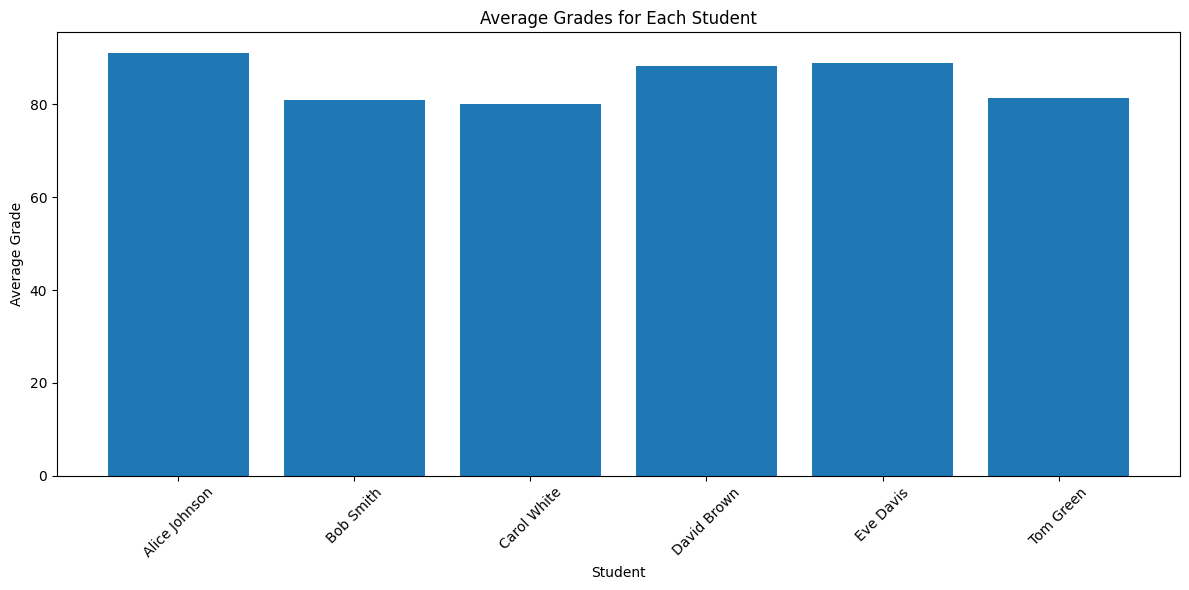

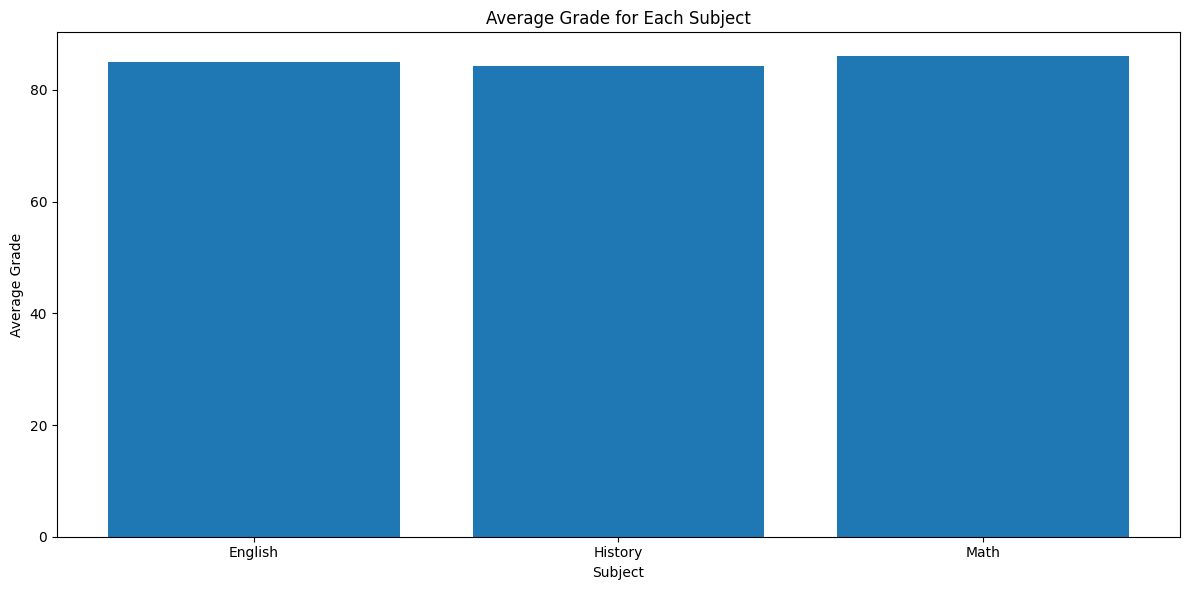

In [49]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('student_grades.db')

## QUESTION 1
students_data = pd.read_sql_query('SELECT * FROM students', conn)
grades_data = pd.read_sql_query('SELECT * FROM grades', conn)

## QUESTION 2
combined_data = pd.read_sql_query('''
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
''', conn)

conn.close()

print("Combined Dataframe:")
print(combined_data)

## QUESTION 3: Matplotlib
avg_grades_per_student = combined_data.groupby(['first_name', 'last_name']).grade.mean().reset_index()
avg_grades_per_student.columns = ['First Name', 'Last Name', 'Average Grade']

plt.figure(figsize=(12, 6))
plt.bar(avg_grades_per_student['First Name'] + ' ' + avg_grades_per_student['Last Name'], avg_grades_per_student['Average Grade'])
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_grades_per_subject = combined_data.groupby('subject').grade.mean().reset_index()
avg_grades_per_subject.columns = ['Subject', 'Average Grade']

plt.figure(figsize=(12, 6))
plt.bar(avg_grades_per_subject['Subject'], avg_grades_per_subject['Average Grade'])
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.tight_layout()
plt.show()


Bonus Task

  first_name last_name  subject  grade
0      Alice   Johnson     Math     95
1      Alice   Johnson  History     90
2      David     Brown  English     91


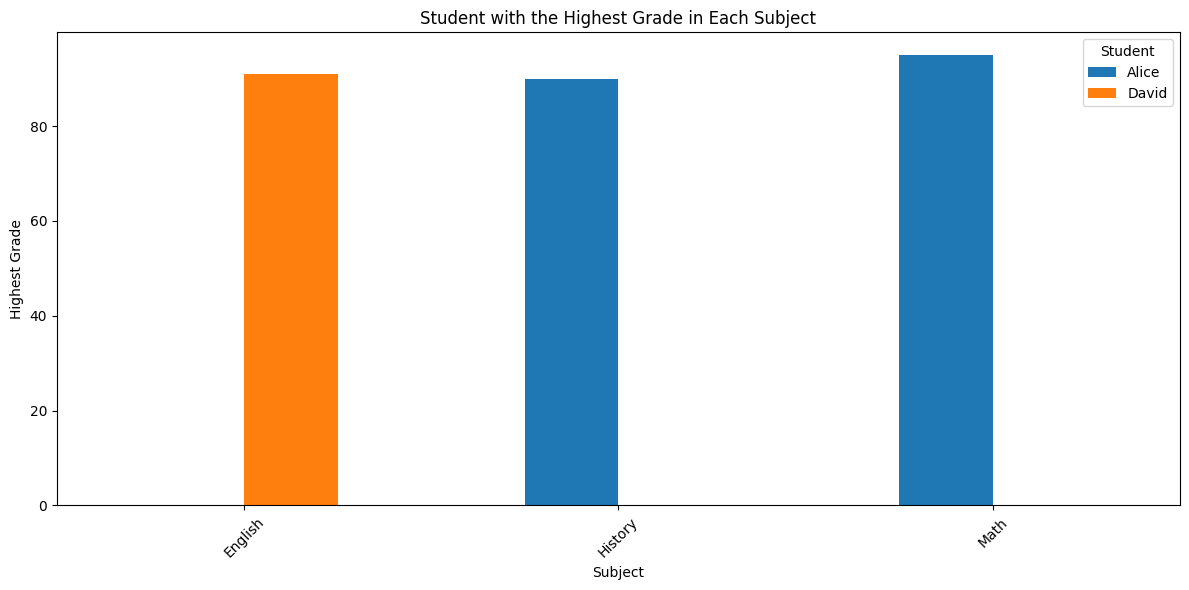

In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('student_grades.db')

# PART 1: Query
query = '''
WITH MaxGrades AS (
    SELECT subject, MAX(grade) AS max_grade
    FROM grades
    GROUP BY subject
)
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM grades g
JOIN students s ON g.student_id = s.student_id
JOIN MaxGrades mg ON g.subject = mg.subject AND g.grade = mg.max_grade
'''

highest_grades_data = pd.read_sql_query(query, conn)
conn.close()

print(highest_grades_data)

# PART 2: Visualization
visualization_data = highest_grades_data.pivot(index='subject', columns='first_name', values='grade')

visualization_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Subject')
plt.ylabel('Highest Grade')
plt.title('Student with the Highest Grade in Each Subject')
plt.legend(title='Student', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
